## DFT calculation using Quantum Espresso and Atomic Simulation Environment

## Molecules

### Defining and visualizing molecules

In [3]:
from ase import Atoms, Atom
from ase.io import write
from ase.visualize import view

# define an Atoms object
atoms = Atoms([Atom('C', [0., 0., 0.]),
               Atom('O', [1.1, 0., 0.])],
              cell=(10, 10, 10))
view(atoms, viewer = 'x3d')          

In [4]:
from xespresso import Espresso
calc = Espresso(label  = 'scf/o2/o2',
                pseudopotentials = {
                    'O': 'O.pbe-n-kjpaw_psl.1.0.0.UPF'},
                calculation = 'scf',
                ecutwfc = 20.0,
                kpts=(4, 4, 4))
atoms.calc = calc
e = atoms.get_potential_energy()
print('Energy: {0:1.3f}'.format(e))


CalculationFailed: Calculator "espresso" failed with command "mpirun -n 4 pw.x  -in o2.pwi > o2.pwo" failed in /home/xing/apps/python-package/xespresso/notebooks/scf/o2 with error code 1

### Si
Make a self-consistent calculation for Si. The first step is to set up the atomic structure of Si.

Atoms(symbols='Si2', pbc=True, cell=[[0.0, 2.715, 2.715], [2.715, 0.0, 2.715], [2.715, 2.715, 0.0]])


<AxesSubplot:>

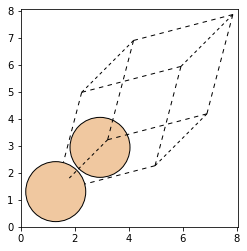

In [1]:
from ase.build import bulk, molecule
from ase.visualize import view
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

atoms = bulk('Si')
print(atoms)
fig, ax = plt.subplots()
plot_atoms(atoms, ax, rotation='45x,45y,45z')


We then setup a calculator that uses a planewave cutoff of 20 Ry, and the PBE exchange correlation functional. We only want the energy, so we specify a self-consistent field (scf) calculation.

In [2]:
from xespresso import Espresso
calc = Espresso(label  = 'scf/si',
                pseudopotentials = {'Si': 'Si.pbe-n-kjpaw_psl.1.0.0.UPF'},
                calculation = 'scf',
                ecutwfc = 20.0,
                kpts=(4, 4, 4))
atoms.calc = calc
# e = atoms.get_potential_energy()
# print('Energy: {0:1.3f}'.format(e))


### Si band structure

scf/bands/si.save
------------------------------

 bands calculation in scf/bands ......


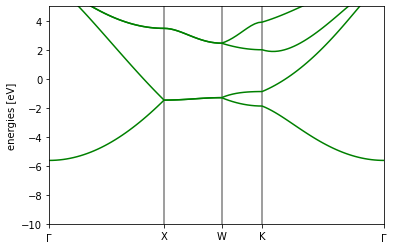

In [3]:
calc.read_results()
calc.nscf(run_type = 'bands', kpts={'path': 'GXWKG', 'npoints': 100})
calc.nscf_calculate()
bs = calc.band_structure()
ax = bs.plot(emin = -10, emax=5)
plt.savefig('figs/si-band.png')
